,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,sepal_width,petal_length,petal_width
count,30.000000,30.000000,30.000000
mean,2.976667,3.766667,1.186667
std,0.362637,1.772069,0.782451
min,2.500000,1.300000,0.100000
25%,2.625000,1.500000,0.225000
50%,3.000000,4.250000,1.250000
75%,3.175000,5.075000,1.875000
max,3.900000,6.000000,2.500000


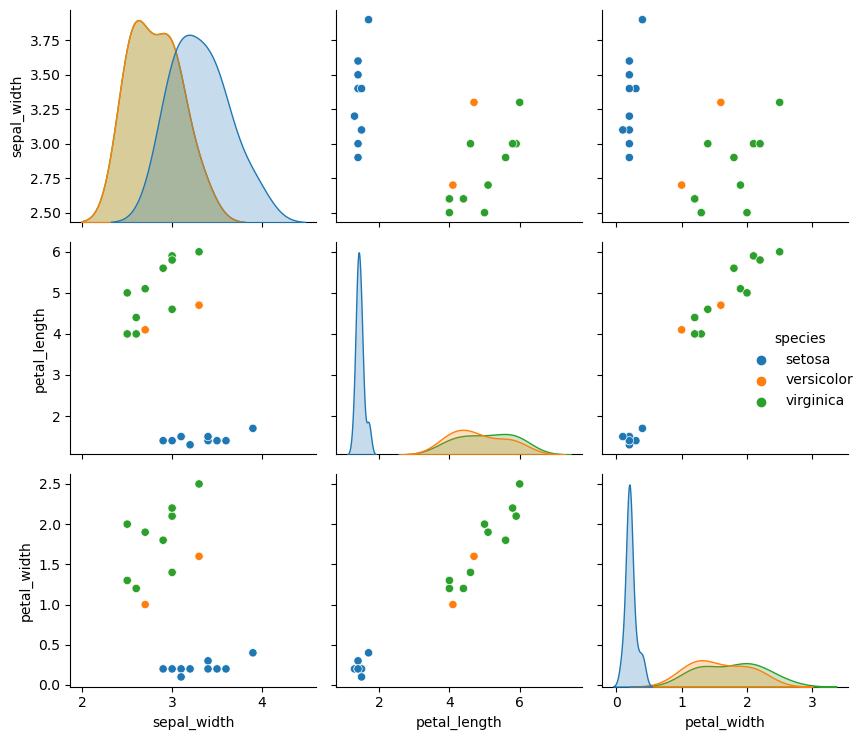

ValueError: could not convert string to float: '...'

In [10]:
# 1. Описание набора данных, Постановка задачи, Описание выбранного классификатора

# Описание набора данных:
# Iris dataset содержит информацию о трех видах ирисов (Setosa, Versicolor, Virginica)
# Каждый образец имеет 4 характеристики:
# - sepal length (длина чашелистика)
# - sepal width (ширина чашелистика)
# - petal length (длина лепестка)
# - petal width (ширина лепестка)

# Постановка задачи:
# Необходимо построить модель классификации, которая по четырем характеристикам
# сможет определить вид ириса

# Выбираем классификаторы:
# 1. DecisionTreeClassifier (дерево решений)
# 2. KNeighborsClassifier (метод k-ближайших соседей)
# 3. LogisticRegression (логистическая регрессия)


# 2. Подключение библиотек и Чтение данных
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Читаем данные
df = pd.read_csv('iris.csv')


# 3. Характеристики набора данных и визуализация
# Отключаем предупреждение о tight layout
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Посмотрим на первые 5 строк
display(df.head())

# Описание данных
display(df.describe())

# Визуализация распределения признаков
sns.pairplot(df, hue='species');
plt.tight_layout() # Добавляем явное указание tight layout
plt.show()


# 4. Разделение выборки
# Разделяем данные на признаки и целевую переменную
X = df.drop('species', axis=1)
y = df['species'] # Исправлено: добавили квадратные скобки

# Разделение на train/test с соотношением 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# 5. Создание модели машинного обучения
# Создаем и обучаем три модели

# Модель 1: Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train.astype('category').cat.codes) # Преобразуем категориальные данные в числовые

# Модель 2: KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train.astype('category').cat.codes)

# Модель 3: Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train.astype('category').cat.codes)


# 6. Оценка качества модели машинного обучения
# Делаем предсказания для каждой модели
tree_pred = tree_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
logreg_pred = logreg_model.predict(X_test)

# Оцениваем точность
tree_accuracy = accuracy_score(y_test, tree_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
logreg_accuracy = accuracy_score(y_test, logreg_pred)

print("Результаты классификации:")
print(f"Точность Decision Tree: {tree_accuracy:.2f}")
print(f"Точность KNN: {knn_accuracy:.2f}")
print(f"Точность Logistic Regression: {logreg_accuracy:.2f}")

# Определяем лучшую модель
best_model = max([(tree_accuracy, "Decision Tree"), 
                  (knn_accuracy, "KNN"), 
                  (logreg_accuracy, "Logistic Regression")])

print(f"\nЛучшая модель: {best_model[1]} с точностью {best_model[0]:.2f}")

# Подробный отчет для лучшей модели
print("\nОтчет по лучшей модели:")
if best_model[1] == "Decision Tree":
    print(classification_report(y_test, tree_pred))
elif best_model[1] == "KNN":
    print(classification_report(y_test, knn_pred))
else:
    print(classification_report(y_test, logreg_pred))



# 7. Применение построенной модели
# Создаем новые примеры для предсказания
new_data = pd.DataFrame(
    [[5.1, 3.5, 1.4, 0.2],  # Setosa
     [6.2, 3.4, 5.4, 2.3],  # Versicolor
     [7.0, 3.2, 4.7, 1.4]], # Virginica
    columns=X)
# Делаем предсказания
predictions = tree_model.predict(new_data)

print("\nПредсказания для новых данных:")
for i, pred in enumerate(predictions):
    print(f"Образец {i+1}: {pred}")

# лучший классификатор - Decision Tree показал точность 97.37%